# 📄 Predicting Advertisement Clicks Using Logistic Regression

## 📝 Description
This notebook uses the **"Advertisement Click" dataset** to build and evaluate a logistic regression model that predicts whether a user will click on an online advertisement. The dataset contains demographic, geographic, and browsing behavior features such as:

- Daily time spent on site  
- Age  
- Area income  
- Daily internet usage  

### Workflow:
- Data exploration and visualization to identify user behavior patterns  
- Feature preprocessing and encoding  
- Splitting data into training and testing sets  
- Training a **Logistic Regression** model for binary classification  
- Evaluating performance using accuracy, confusion matrix, and classification report  

This project demonstrates how logistic regression can be applied to marketing data to help businesses target ads more effectively.


---

## 📊 Data Loading and Initial Exploration

In [130]:
import pandas as pd
import seaborn as sns

In [131]:
data = pd.read_csv("advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [133]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


---
## 🔍 Checking for Missing Values
We visualize and inspect the dataset to identify any null or missing entries before proceeding with data preprocessing.


<Axes: >

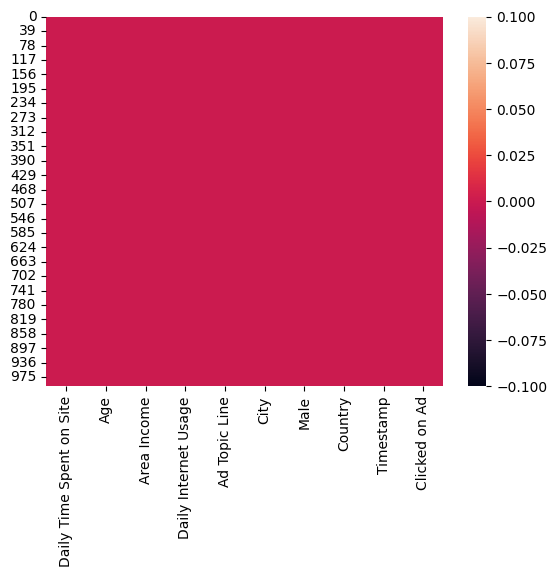

In [134]:
sns.heatmap(data.isnull())

No NaN found

---

## 🧹 Dropping Irrelevant Features
We remove non-numeric or non-essential columns (`Timestamp`, `Ad Topic Line`, `City`, and `Country`) that do not contribute meaningfully to the prediction task, simplifying the dataset for model training.


In [135]:
data = data.drop(["Timestamp"],axis = 1)
data = data.drop(["Ad Topic Line"],axis = 1)
data = data.drop(["City"],axis = 1)
data = data.drop(["Country"],axis = 1)

## 📌 Target Variable Analysis
We convert the `Clicked on Ad` column to a categorical type and visualize its distribution to understand the class balance in the dataset.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  1000 non-null   float64 
 1   Age                       1000 non-null   int64   
 2   Area Income               1000 non-null   float64 
 3   Daily Internet Usage      1000 non-null   float64 
 4   Male                      1000 non-null   int64   
 5   Clicked on Ad             1000 non-null   category
dtypes: category(1), float64(3), int64(2)
memory usage: 40.3 KB


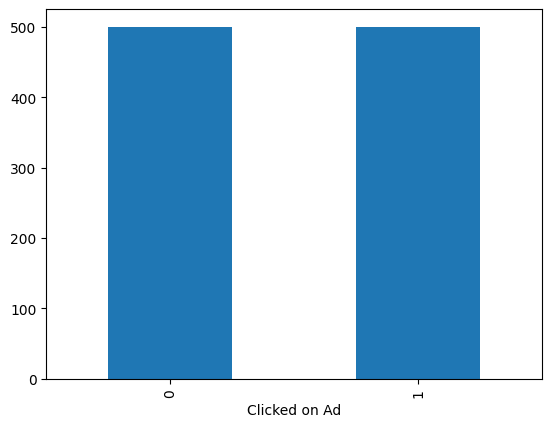

In [136]:
data["Clicked on Ad"] = data["Clicked on Ad"].astype("category",copy=False)
data["Clicked on Ad"].value_counts().plot(kind="bar")
data.info()

## 🎯 Splitting Features and Target
We separate the dataset into **predictor variables** (`x`) and the **target variable** (`y`) to prepare for model training.


In [137]:
# Divide the data into target and predictors
y_train = data["Clicked on Ad"]
X_train = data.drop(["Clicked on Ad"],axis = 1)

---
## Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

#### View the variables
Let's get more familiar with your dataset.  

The code below prints the first five values of `X_train` and the type of the variable.

In [139]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
    Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                     68.95   35     61833.90                256.09     0
1                     80.23   31     68441.85                193.77     1
2                     69.47   26     59785.94                236.50     0
3                     74.15   29     54806.18                245.89     1
4                     68.37   35     73889.99                225.58     0
Type of X_train: <class 'pandas.core.frame.DataFrame'>


In [140]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: category
Categories (2, int64): [0, 1]
Type of y_train: <class 'pandas.core.series.Series'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [141]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (1000, 5)
The shape of y_train is: (1000,)
We have m = 1000 training examples


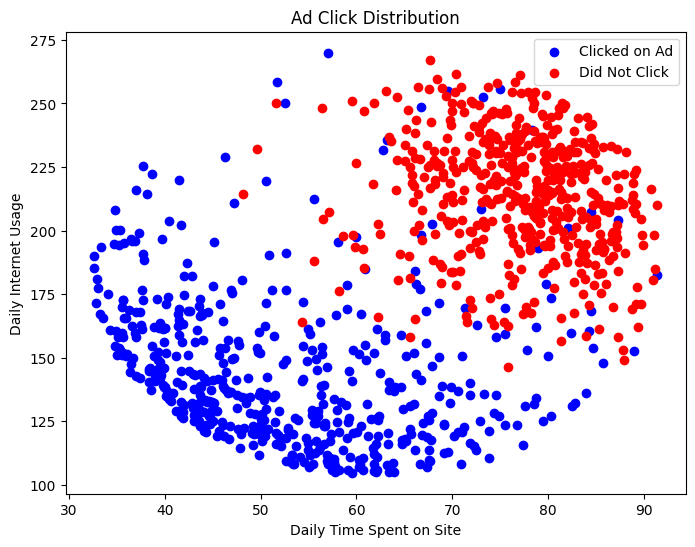

In [142]:
import matplotlib.pyplot as plt

# Choose any two features to visualize
x_feature = "Daily Time Spent on Site"
y_feature = "Daily Internet Usage"

# Create a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(
    X_train[x_feature][y_train == 1],
    X_train[y_feature][y_train == 1],
    color="blue", label="Clicked on Ad"
)
plt.scatter(
    X_train[x_feature][y_train == 0],
    X_train[y_feature][y_train == 0],
    color="red", label="Did Not Click"
)

# Add labels and legend
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Ad Click Distribution")
plt.legend()
plt.show()


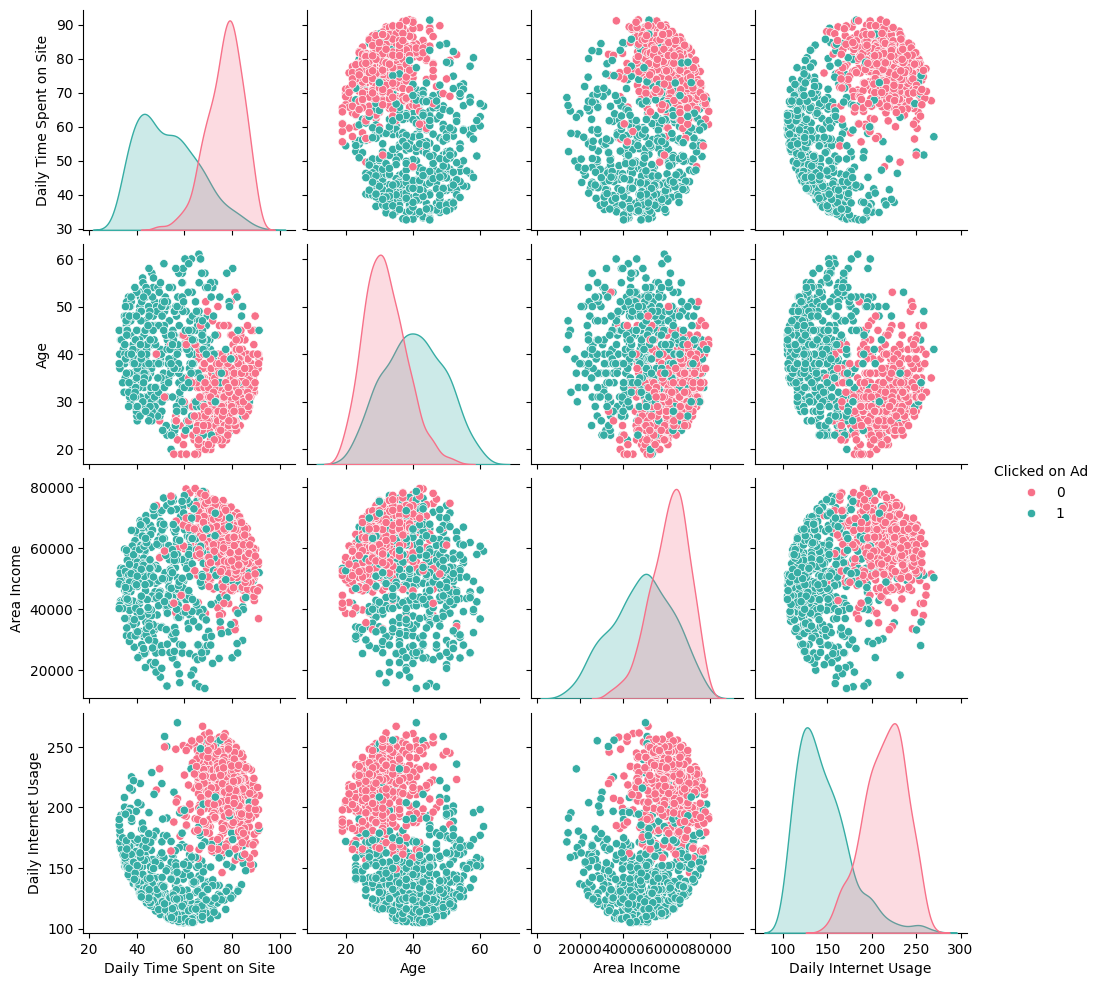

In [143]:
sns.pairplot(data, hue="Clicked on Ad", vars=[
    "Daily Time Spent on Site",
    "Age",
    "Area Income",
    "Daily Internet Usage"
], diag_kind="kde", palette="husl")
plt.show()


---
## Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

<a name='ex-01'></a>

In [144]:

def sigmoid(z):

    g = 1/(1+np.exp(-z))

    return g

### Check

Expeacted = *0.5*

In [145]:
# Note: You can edit this value
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


In [146]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


---
## Cost function for logistic regression

In this section, you will implement the cost function for logistic regression.


complete the `compute_cost` function using the equations below.

Recall that for logistic regression, the cost function is of the form

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is -

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.




In [147]:
def compute_cost(X, y, w, b, *argv):

    m, n = X.shape


    total_loss =0
    for i in range (m):
        z=np.dot(X[i], w) + b
        f= sigmoid(z)
        #print(f":f={f}")

        #Clip values to avoid log(0)
        f = np.clip(f, 1e-15, 1 - 1e-15)
        #print(f":f={f}")

        loss = -y[i]*np.log(f)-(1-y[i])*np.log(1-f)
        total_loss = total_loss + loss

    total_cost = (1/m)* total_loss



    return total_cost

### Check

Expeacted = *0.693*

In [148]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns only
X_train_numeric = X_train.select_dtypes(include=['number'])

# Convert to NumPy
X_train_np = X_train_numeric.to_numpy()


y_train_np = y_train
m, n = X_train.shape

# Initialize parameters
initial_w = np.zeros(n)
initial_b = 0.

# Compute initial cost
cost = compute_cost(X_train_np, y_train_np, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))


Cost at initial w and b (zeros): 0.693


In [149]:
# Compute and display cost with non-zero w and b
test_w = np.array([5139, 3134,314,130,1001300])
test_b = 12133131
cost = compute_cost(X_train_np, y_train_np, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))


Cost at test w and b (non-zeros): 17.270


---
## Gradient for logistic regression

In this section, you will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

complete the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

In [150]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b):

    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.


    for i in range(m):
        z_wb = np.dot(X[i],w)
        z_wb += b
        f_wb = sigmoid(z_wb)

        dj_db_i = f_wb-y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw[j] += (f_wb-y[i])*X[i,j]

    dj_dw = (1/m)*dj_dw
    dj_db = (1/m)*dj_db



    return dj_db, dj_dw

In [151]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train_np, y_train_np, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):0.0
dj_dw at initial w and b (zeros):[5.927210000000008, -2.1625, 3192.7931699999967, 17.25682000000001, 0.0095]


In [152]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5,0,0,6])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train_np, y_train_np, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())


dj_db at test w and b: -0.49999996991911455
dj_dw at test w and b: [-26.572887682425325, -20.166999261778017, -24307.20526896654, -72.74322403945791, -0.23099996998635422]


---
## Learning parameters using gradient descent

In [153]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):


    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

**Note**
The code block below takes a couple of minutes to run, especially with a non-vectorized version. You can reduce the `iterations` to test your implementation and iterate faster. If you have time later, try running 100,000 iterations for better results.

In [154]:
np.random.seed(1)
initial_w = 0.0001 * (np.random.rand(5) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train_np, y_train_np, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations,0)

Iteration    0: Cost    17.27   


/tmp/ipython-input-2282162079.py:3: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))


Iteration 1000: Cost    17.27   
Iteration 2000: Cost    17.27   
Iteration 3000: Cost    17.27   
Iteration 4000: Cost    17.27   
Iteration 5000: Cost    17.27   
Iteration 6000: Cost    17.27   
Iteration 7000: Cost    17.27   
Iteration 8000: Cost    17.27   
Iteration 9000: Cost    17.27   
Iteration 9999: Cost    17.27   


## Feature Scaling

The lectures discussed three different techniques:
- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $
- Z-score normalization which we will explore below.


### z-score normalization
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [155]:

def zscore_normalize_features(X):

    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return X_norm


In [156]:

print("Before normalization:\n", X_train_np, "\nfinish")

X_train_np = zscore_normalize_features(X_train_np)

print("After normalization:\n", X_train_np, "\nfinish")

Before normalization:
 [[6.895000e+01 3.500000e+01 6.183390e+04 2.560900e+02 0.000000e+00]
 [8.023000e+01 3.100000e+01 6.844185e+04 1.937700e+02 1.000000e+00]
 [6.947000e+01 2.600000e+01 5.978594e+04 2.365000e+02 0.000000e+00]
 ...
 [5.163000e+01 5.100000e+01 4.241572e+04 1.203700e+02 1.000000e+00]
 [5.555000e+01 1.900000e+01 4.192079e+04 1.879500e+02 0.000000e+00]
 [4.501000e+01 2.600000e+01 2.987580e+04 1.783500e+02 0.000000e+00]] 
finish
After normalization:
 [[ 0.24926659 -0.11490498  0.50969109  1.73403    -0.96269532]
 [ 0.96113227 -0.57042523  1.00253021  0.31380538  1.03875025]
 [ 0.28208309 -1.13982553  0.35694859  1.28758905 -0.96269532]
 ...
 [-0.84377541  1.707176   -0.93857029 -1.35892388  1.03875025]
 [-0.59638946 -1.93698596 -0.97548353  0.18117208 -0.96269532]
 [-1.26155474 -1.13982553 -1.87383208 -0.0376045  -0.96269532]] 
finish


In [157]:
np.random.seed(1)
initial_w = 0.0001 * (np.random.rand(5) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train_np, y_train_np, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     4.00   
Iteration 1000: Cost     3.34   
Iteration 2000: Cost     2.68   
Iteration 3000: Cost     2.05   
Iteration 4000: Cost     1.51   
Iteration 5000: Cost     1.15   
Iteration 6000: Cost     0.93   
Iteration 7000: Cost     0.79   
Iteration 8000: Cost     0.69   
Iteration 9000: Cost     0.62   
Iteration 9999: Cost     0.56   


## Effect of Feature Scaling

- **Without scaling:** Cost stayed constant at **17.27** for all iterations, and an overflow warning occurred in `exp()` — gradient descent failed to converge.

- **With scaling:** Cost started at **4.00** and decreased steadily to **0.56** over 10,000 iterations — gradient descent converged successfully and much faster.

**Conclusion:** Scaling ensures features are on similar ranges, prevents numerical overflow, and greatly improves convergence speed.


In [158]:
from sklearn.model_selection import train_test_split

x_tr, X_test, y_tr, y_test = train_test_split(X_train_np,y_train_np,test_size = 0.3,random_state =42)

##  Model Prediction
We initialize and train a **Logistic Regression** model using the training dataset, then generate predictions for the test dataset to evaluate how well the model generalizes to unseen data.


In [159]:

def predict(X, w, b):

    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += X[i,j]*w[j]

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        if f_wb >= 0.5:
            p[i]=1
        else:
            p[i]=0

    return p

In [160]:
y_pred = predict(X_test, w, b)
print(f'Output of predict: shape {y_pred.shape}, value {y_pred}')

Output of predict: shape (300,), value [0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]


In [161]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print (f":Accuracy = {accuracy:.2f}")

:Accuracy = 0.79


In [162]:
# Accuracy = (Number of correct predictions) / (Total number of predictions)

correct_predictions = np.sum(y_test == y_pred)
accuracy = correct_predictions / len(y_test)

print(f"Accuracy = {accuracy:.2f}")


Accuracy = 0.79


In [163]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       146
           1       1.00      0.58      0.74       154

    accuracy                           0.79       300
   macro avg       0.85      0.79      0.78       300
weighted avg       0.85      0.79      0.78       300



In [164]:

# y_test and y_pred are NumPy arrays
classes = np.unique(y_test)
report = {}

for c in classes:
    # True positives: predicted c and actually c
    tp = np.sum((y_pred == c) & (y_test == c))
    # False positives: predicted c but actually not c
    fp = np.sum((y_pred == c) & (y_test != c))
    # False negatives: predicted not c but actually c
    fn = np.sum((y_pred != c) & (y_test == c))
    # Support: number of actual c
    support = np.sum(y_test == c)

    # Precision, Recall, F1
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    report[c] = {
        "precision": precision,
        "recall": recall,
        "f1-score": f1,
        "support": support
    }

# Print report
print("Class  Precision  Recall  F1-score  Support")
for c, metrics in report.items():
    print(f"{c:5}  {metrics['precision']:.2f}      {metrics['recall']:.2f}   {metrics['f1-score']:.2f}     {metrics['support']}")

# Optional: overall accuracy
accuracy = np.sum(y_test == y_pred) / len(y_test)
print(f"\nAccuracy: {accuracy:.2f}")


Class  Precision  Recall  F1-score  Support
    0  0.70      1.00   0.82     146
    1  1.00      0.58   0.74     154

Accuracy: 0.79
